AKHILA REDDY KOMMITI

11705751

In [1]:
#Imported Basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Timeseries RNN neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [3]:
#Tensorflow was installed and updated.
!pip install --upgrade tensorflow

In [4]:
import tensorflow as tf

In [5]:
#Import Keras:TimeseriesGenerator
#This class produce timeseries btaches used in training/testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#Import Keras: MinMaxScaler
#This class is used to preprocess the data
from sklearn.preprocessing import MinMaxScaler

Generate Data

In [6]:
#Using Numpy created a sample sine wave
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(0,64,1024)
y = np.sin(x)

In [7]:
x

array([0.00000000e+00, 6.25610948e-02, 1.25122190e-01, ...,
       6.38748778e+01, 6.39374389e+01, 6.40000000e+01])

In [8]:
y

array([0.        , 0.06252029, 0.12479597, ..., 0.86393146, 0.89372716,
       0.92002604])

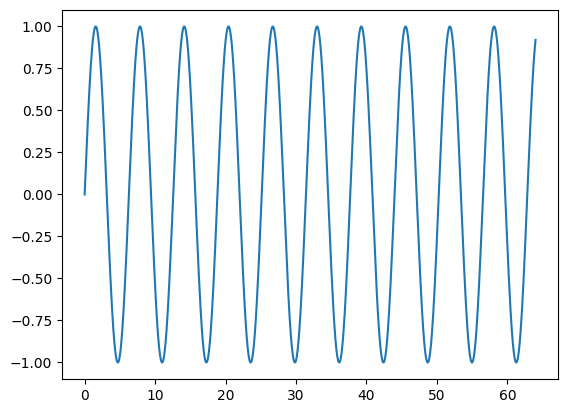

In [9]:
plt.plot(x, y)

In [10]:

# Index: x; Data: y; column label: Sine

df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [11]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [12]:
len(df)

1024

# Split Data --> Train / Test

In [13]:
# a predetermined percentage of the data is used for testing

test_percent = 0.2

In [14]:
# a group of data points designated for testing the model
# 20% of the original dataset
test_percent = 0.2
len(df)*test_percent

204.8

In [15]:
# finding the length of the testing dataset
#  204.8 data points are used for testing

test_length = np.round(len(df)*test_percent)

In [16]:
test_length = np.round(len(df)*test_percent)
test_length

205.0

In [17]:

# Index starting with 0

test_start_index = int(len(df) - test_length)

In [18]:
test_start_index = int(len(df) - test_length)
test_start_index

819

In [19]:

# Training dataset: All the indices from start to test_start_index
# (Do not include test_start_index)
data_train = df.iloc[: test_start_index]

# Testing dataset: All the indices fromt test_start_index to the dataframe
# (including test_start_index)
data_test = df.iloc[test_start_index :]



In [20]:
data_train = df.iloc[: test_start_index]
data_train.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [21]:
data_test = df.iloc[test_start_index :]
data_test.head(5)

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887


# Normalize Data (Scale it into the range [0, 1])

In [22]:
#To standardize the data a MinMaxscaler was constructed
scaler = MinMaxScaler()

In [23]:

# Do not scale the testing data ;only scale training data

#instructions for performing the normalization on the scaler
scaler = MinMaxScaler()
scaler.fit(data_train)

MinMaxScaler()

In [24]:
# Normalize the training dataset
normalized_train = scaler.transform(data_train)

# Normalize the testing dataset
normalized_test = scaler.transform(data_test)

# Create TimeseriesGenerator instance

In [25]:
# TimeseriesGenerator: Create time series batches for training and testing

# Use 50 historical data points to predict the next one
length = 50
#batcgh_size =Number of Time series  samples in a batch
batch_size = 1

# Create a TimeseriesGenerator for training: training_tsGenerator
# TimeseriesGenerator(inputs dataset, outputs dataset, length, batch_size)

train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length=50, batch_size=1)

In [26]:
normalized_train = scaler.transform(data_train)
len(normalized_train)

819

In [27]:
 # first batch look like?
X,y = train_tsGenerator50[0]

In [28]:
# Print X.flatten()
train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length=50, batch_size=1)
X,y = train_tsGenerator50[0]
X.flatten()

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [29]:
# Print y: What does X predict

y

array([[0.50676759]])

# Build, Train, and Test Model

# Build SimpleRNN Model

In [30]:

# Features: How many features used to train the model: Only one
n_Features = 1

# define model
model = Sequential()

# Add a simple RNN layer: Using SimpleRRN cells
# This layer has 100 neurons: One neuron for each input data point
# Notes: # time series steps of the input sequence: 50
model.add(SimpleRNN(100, input_shape=(length, n_Features)))

# Add a fully-connected layer for the final prediction
# Only one neuro of the Dense/Fully-Connected layer
# --> Output: Predict the next data point of the input sequence: only one value
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile Model

In [31]:

# Loss function: mse
# Optimizer: Adam
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

# Train (Fit) Model

In [32]:

# Use fit_generator(), Not fit()

model.fit(train_tsGenerator50, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.0128
Epoch 2/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 2.7085e-04
Epoch 3/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 7.4397e-04
Epoch 4/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 3.9948e-06
Epoch 5/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.2185e-04


# Visualize Model's Performance after Training

<Axes: >

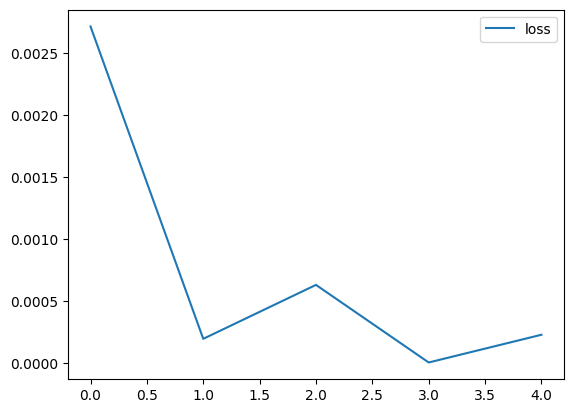

In [33]:
# Load the loss data
df_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss
df_model_loss.plot()

# Evaluate Model on Test Data

# A sneak peek into the test data

In [34]:
# Number of time steps of the input time series
length

50

In [35]:
# 1st time series batch (50 data points)
# array[-length:]: A sequence of [50th to the last .. last]
first_eval_batch = normalized_train[-length :]

first_eval_batch

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


In [36]:
first_eval_batch = first_eval_batch.reshape((1, length, n_Features))

first_eval_batch

array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [37]:
first_eval_batch.shape

(1, 50, 1)

# Evaluate Model

In [38]:


# Make a list to hold all of the predictions
# Similar to: test_predictions = list();
test_predictions = []

# The 1st batch: The 1st time series input sequence
# = the last 50 data points of the train data set
first_eval_batch = normalized_train[-length:]

# restructure the batch into three dimensional array:
current_batch = first_eval_batch.reshape((1, length, n_Features))

# Run a FOR loop to make a prediction for each batch
for i in range(len(data_test)):

 # Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]

 # store the predictions in to the list of prediction
    test_predictions.append(current_pred)

 #Prepare a new batch in advance of the following round of testing.
 # --) remove the first data point of the current input sequence
 # --) The input sequence should be finished by adding the most recent forecast.
 # --) Maintain the number of time series steps: 50
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

In [39]:
# Converted the scaled result back to the real values
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions

array([[ 0.81969992],
       [ 0.8508151 ],
       [ 0.87336047],
       [ 0.89285684],
       [ 0.90531989],
       [ 0.91385667],
       [ 0.91534333],
       [ 0.91369169],
       [ 0.90503689],
       [ 0.89346564],
       [ 0.87548323],
       [ 0.85477379],
       [ 0.82854784],
       [ 0.79931771],
       [ 0.76562023],
       [ 0.72929134],
       [ 0.68860548],
       [ 0.64598474],
       [ 0.5992867 ],
       [ 0.55122133],
       [ 0.49962012],
       [ 0.44676196],
       [ 0.39108773],
       [ 0.3344987 ],
       [ 0.27533415],
       [ 0.21582069],
       [ 0.15411545],
       [ 0.09241068],
       [ 0.0289247 ],
       [-0.03423435],
       [-0.09868742],
       [-0.16256417],
       [-0.22712649],
       [-0.2908404 ],
       [-0.35476894],
       [-0.41734828],
       [-0.47976317],
       [-0.54037139],
       [-0.60022338],
       [-0.65792145],
       [-0.71430601],
       [-0.76810207],
       [-0.820128  ],
       [-0.86909189],
       [-0.91582585],
       [-0

In [40]:
#Update data_test
data_test

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [41]:
# adding the actual forecast findings into the initial data frame of the test data
# Added as another column

data_test['Predictions'] = true_predictions

<ipython-input-41-d35ff14a3317>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [42]:
# Update data_test
data_test

,Sine,Predictions
51.237537,0.826045,0.819700
51.300098,0.859666,0.850815
51.362659,0.889923,0.873360
51.425220,0.916698,0.892857
51.487781,0.939887,0.905320
...,...,...
63.749756,0.794329,0.657135
63.812317,0.830756,0.616819
63.874878,0.863931,0.572246
63.937439,0.893727,0.523864


<Axes: >

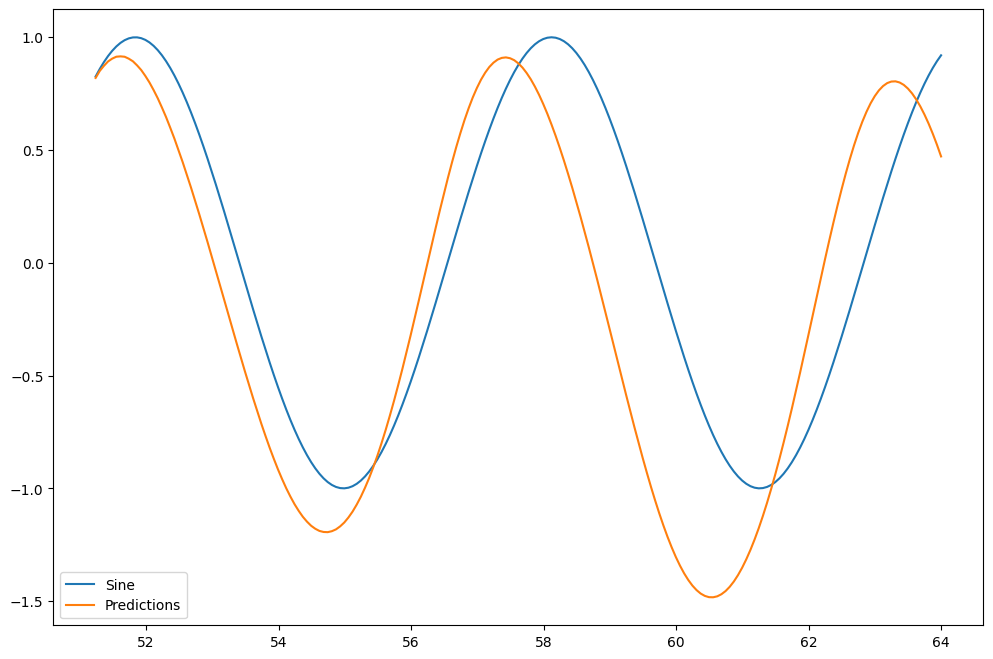

In [43]:
# Visualize the data of the updated test data
# Compare the predicted sine wave against the original sine wave

data_test.plot(figsize=(12,8))